# **Multiple Regression**
## ECE 204 Data Science & Engineering

## Reading the data

Let's look at a dataset pertaining to housing. This data contains house sale prices in King County for houses sold between May 2014 and May 2015. In addition to price of houses, the dataset also contains 14 attributes or features of these houses. <br>

In this case study, we will use **Multiple Regression** to predict the prices of houses given the feature information.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('housing_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,400,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,3,6,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,910,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,0,47.6168,-122.045


In [2]:
df.shape

(21613, 12)

As we see from the data, in addition to the price information we have 11 features for each of the 21613 houses. Example of features are the number of bedrooms, number of bathrooms, the size of living area, the size of the lot, the condition of the property and so on.

## Simple Linear Regression

Let's start by using just one feature and implementing a Simple Linear Regression model.<br> We know that size of the living area can be a potential indicator of the price. First, visualize the how the living area size can affect price.

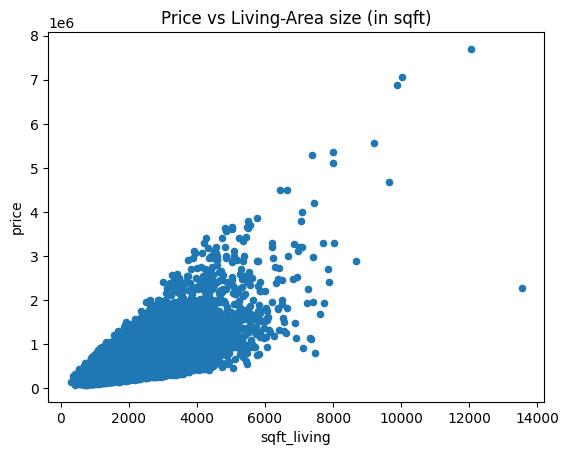

In [3]:
ax = df.plot.scatter(x='sqft_living', y='price', title='Price vs Living-Area size (in sqft)')

We're going to be doing a lot of regressions, so why not make a function?

In [4]:
from sklearn.linear_model import LinearRegression

def do_regression( X, y ):
        
    # Linear regression using the entire dataset
    lin_model = LinearRegression()
    lin_model.fit(X, y)
    
    # Print the intercept, coefficients, and R^2 value
    print("Intercept:", lin_model.intercept_)
    print("Coefficients:", lin_model.coef_)
    print("R-squared value:", lin_model.score(X, y))
    
    return lin_model

Regression using a single feature

In [5]:
# Fitting a simple linear regression model on the "whole" dataset
X = df[['sqft_living']]
y = df['price']
lin_model = do_regression( X, y )

Intercept: -43580.743094473146
Coefficients: [280.6235679]
R-squared value: 0.4928532179037931


This implies that based on just the one feature "sqft_living" we have the formula for 
price = -43580.74 + (280.62 / sq.ft) * (sq.ft. living) <br>
However, We see that the R-squared is 0.49 indicating this feature alone may not able to give us a model that fits our data well. <br>

Let's visualize how well our model fit the data!

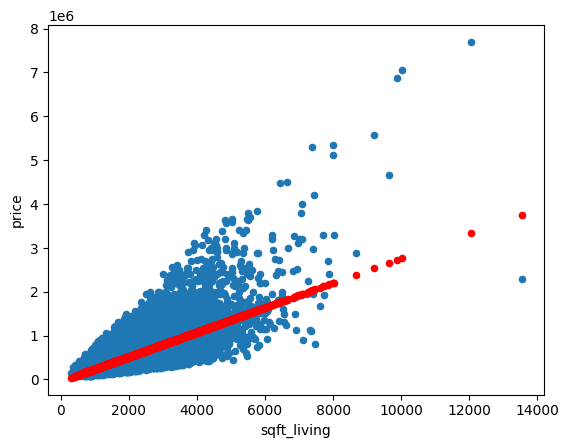

In [6]:
y_pred = lin_model.predict(X)
df_pred = pd.DataFrame({'sqft_living': X.sqft_living, 'orig_price': y, 'pred_price': y_pred})

ax = df_pred.plot.scatter(x='sqft_living', y='orig_price');
df_pred.plot.scatter(x='sqft_living', y='pred_price', color='red', ax=ax);
ax.set_ylabel("price");

Let's also calculate the Error on the Training Data (a.k.a. the residuals) and see how they are distributed. Note that we are using the whole data for training here. For this, we'll calculate the residuals and then plot a histogram.

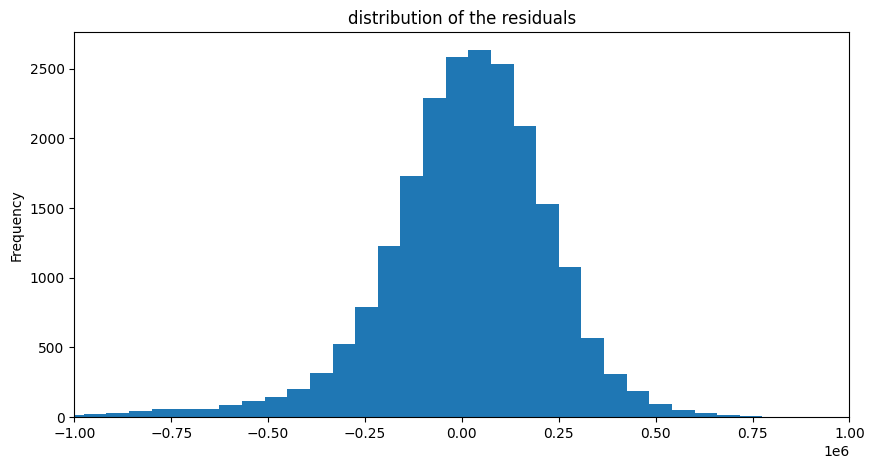

In [7]:
residuals = y_pred - y
residuals.plot.hist(bins=100, xlim=(-1e6,1e6), figsize=(10,5), title='distribution of the residuals');

**Note:** By definition, regression picks the line so that the residuals have zero-mean and have a "sum of squares", or RSS, that is as small as possible. The RSS is the square of the standard deviation. So the standard deviation of the residuals should also be as small as possible. Let's verify this:

In [8]:
residuals.describe()

count    2.161300e+04
mean     1.109159e-10
std      2.614468e+05
min     -4.362067e+06
25%     -1.061821e+05
50%      2.404282e+04
75%      1.474860e+05
max      1.476062e+06
Name: price, dtype: float64

Let's use more features and see if we get a better fit to our data.

## Multiple Regression

We will now use more features to feed into a regression model and see if our R-squared improves. <br> 
But how do we select our features? Let's look at how the rest of our features look like when plotted against the price.

In [9]:
# Looking at what other features we have
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_basement', 'lat', 'long'],
      dtype='object')

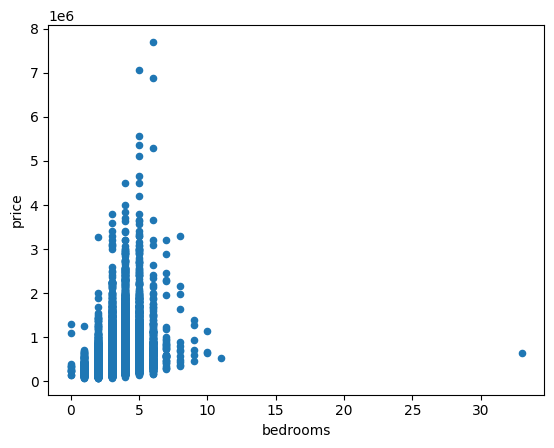

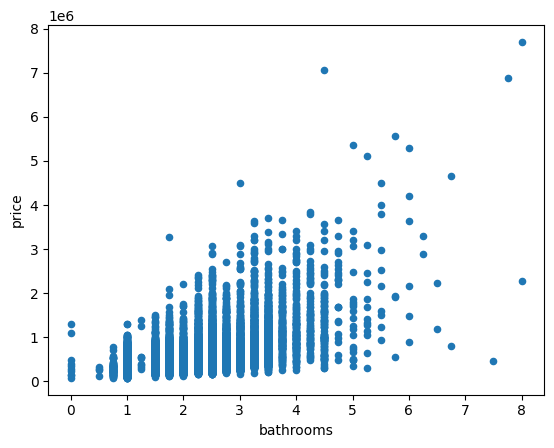

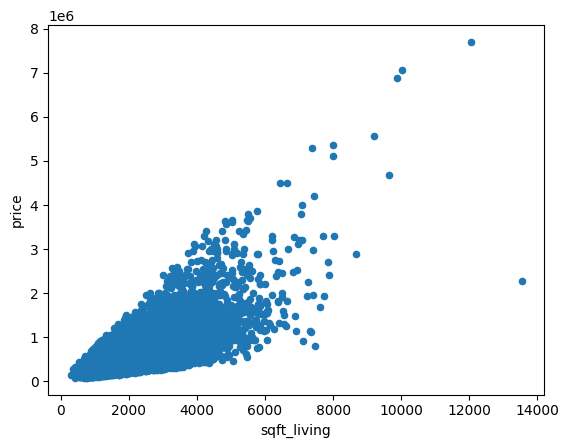

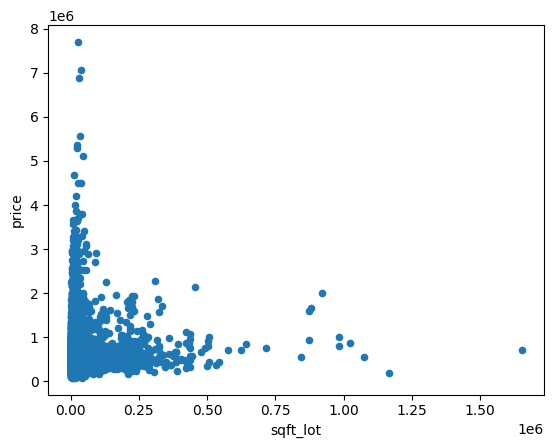

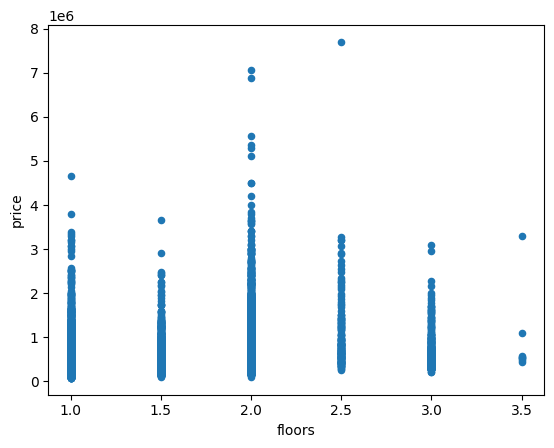

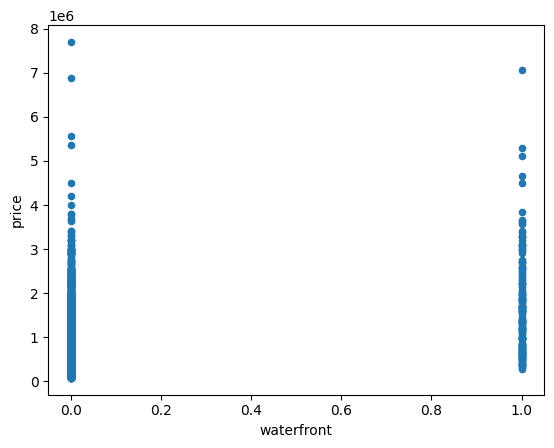

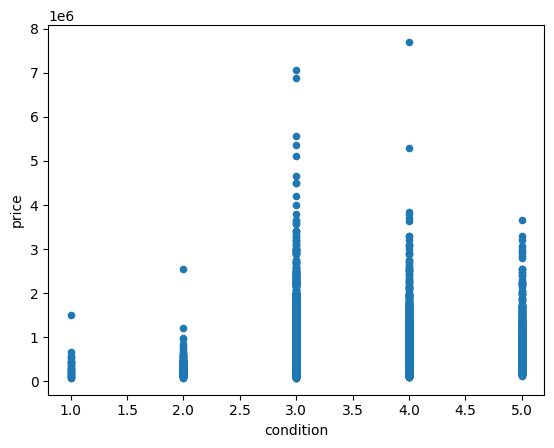

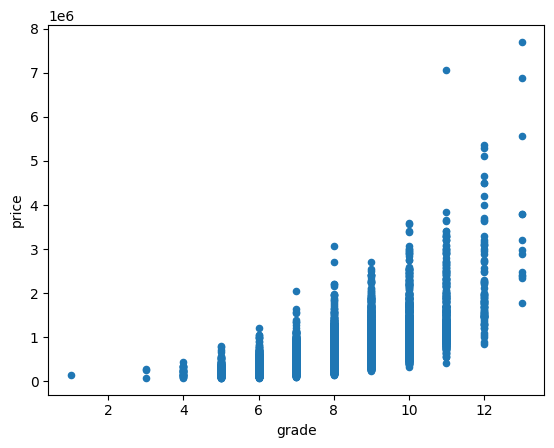

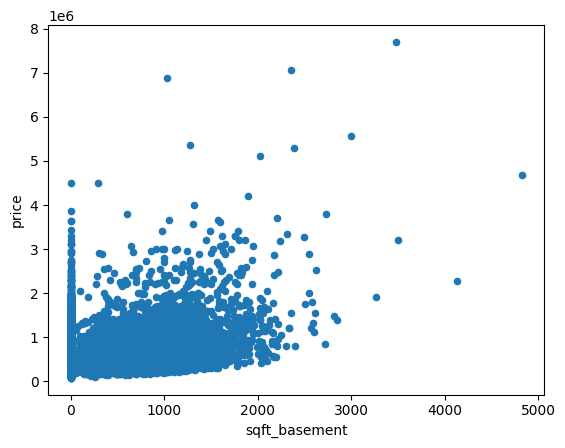

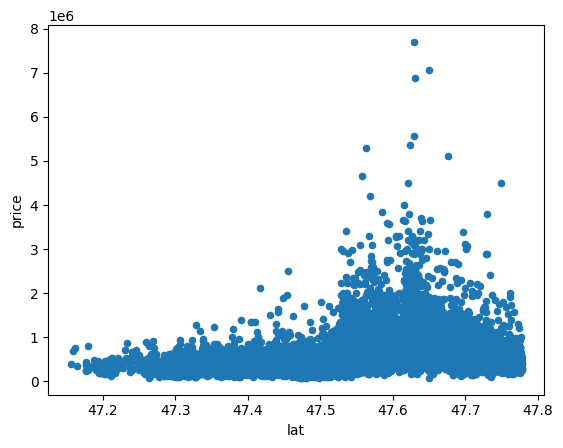

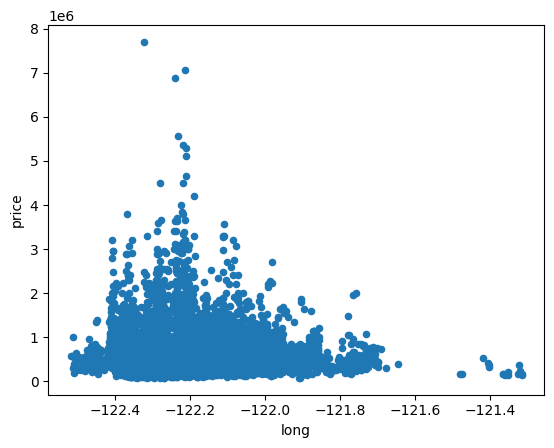

In [10]:
# Price is our target variable, and the other columns are our features
target = 'price'
features = df.columns[1:]

for feat in features:
    df.plot.scatter(x=feat, y=target)

In [11]:
(df.price<1000000).sum()

np.int64(20121)

Let's try using four features

In [12]:
X = df[['sqft_living', 'grade', 'bathrooms', 'bedrooms']]
y = df['price']
do_regression(X,y)

Intercept: -478406.77644244523
Coefficients: [   226.6532061   96138.03615975 -26738.29100485 -39305.5485805 ]
R-squared value: 0.5433509785456612


LinearRegression()

In [13]:
X = df[['sqft_living']]
y = df['price']
lin_model = do_regression(X,y)

price = lin_model.coef_ * 2750 +lin_model.intercept_
round(price.item(), 3)

Intercept: -43580.743094473146
Coefficients: [280.6235679]
R-squared value: 0.4928532179037931


728134.069

In [14]:
X = df[['grade', 'bathrooms', 'bedrooms']]
y = df['price']
lin_model = do_regression(X,y)

Intercept: -1002057.3216230305
Coefficients: [177870.80732722  59909.81827712  15876.30885941]
R-squared value: 0.45850625018614655


We see that our R-squared value improved, but can we do even better? Let's use all features and see

In [15]:
X = df.iloc[:,1:]
y = df['price']
lin_model = do_regression(X,y)

Intercept: -65054852.06699581
Coefficients: [-3.44331820e+04  4.71488040e+03  2.19351888e+02  5.37560606e-02
 -2.91610129e+04  7.82429391e+05  5.42505582e+04  9.03388726e+04
 -2.00914407e+01  6.33136069e+05 -2.80646205e+05]
R-squared value: 0.6619237624051806


Let's make a histogram like we did before

count    2.161300e+04
mean    -4.510061e-09
std      2.134636e+05
min     -4.544841e+06
25%     -8.019286e+04
50%      1.473850e+04
75%      1.105164e+05
max      1.151944e+06
Name: price, dtype: float64

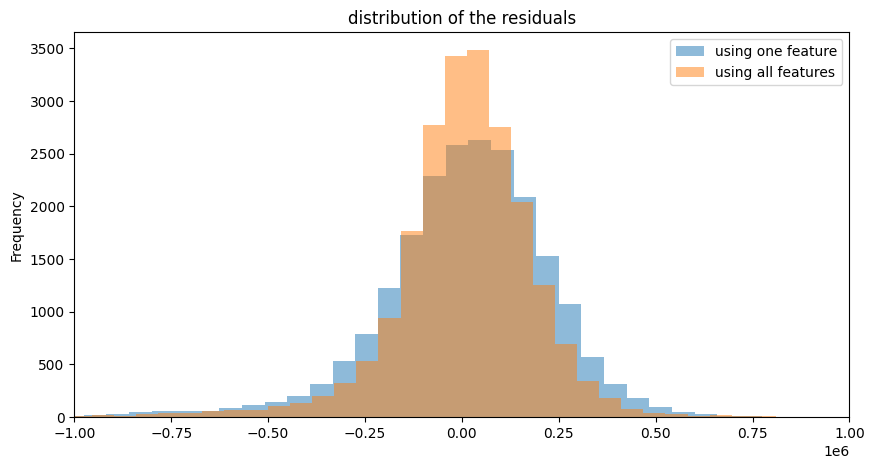

In [16]:
y_pred = lin_model.predict(X)

residuals2 = y_pred - y

ax = residuals.plot.hist(bins=100, xlim=(-1e6,1e6), figsize=(10,5), title='distribution of the residuals', alpha=0.5)
residuals2.plot.hist(bins=100, xlim=(-1e6,1e6), figsize=(10,5), title='distribution of the residuals', ax=ax, alpha=0.5)
ax.legend(['using one feature','using all features'])
residuals2.describe()

We see that in this case, using all the features gives us a better Mulitple Regression fit to the data.

---